# Feature Enginnering using two datasets with garbage values in it. 

The data files Bollywood.csv and Bollywood - 2 .csv contains the box office collection and social media promotion information about the movies released in 2013 – 2015 period. 

Following is the information about the columns (names can vary):
•	Serial Id of movie
•	Release date of movie
•	Release time of movie like Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)
•	Genre of movie like Romance, Thriller, Action, comedy etc.
•	Budget of movie in crores
•	Box office collection of movie in crore
•	YouTube views of movies trailers
•	YouTube likes for the movie trailers
•	YouTube dislikes for the movie trailers


In [1]:
#Import required libraries 
import pandas as pd
import numpy as np

In [2]:
#Read the given dataset into dataframes
df1 = pd.read_csv('bollywood.csv')
df2 = pd.read_csv('bollywood - 2.csv')

#List the information regarding both the dataframes
print (df1.info())
print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
No                     51 non-null int64
RelDate                51 non-null object
MovieName              51 non-null object
ReleaseTime            51 non-null int64
Genre                  51 non-null object
Budget                 51 non-null object
BoxOfficeCollection    51 non-null object
YoutubeViews           51 non-null int64
YoutubeLikes           50 non-null float64
YoutubeDislikes        48 non-null float64
YoutubeLikeDislikes    51 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
Movie_ID                 99 non-null int64
Release_Date             99 non-null object
Movie_Name               99 non-null object
Release_Time             99 non-null object
Genre                    99 non-null object
BudgetCr                 99 non-null int64
BoxOf

# Approach Implemented : Doing clean-up both data frames separately and then will concatenate the dataset into one

In [3]:
#Start cleaning dataset1
#List the top 5 rows
df1.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736


In [4]:
#list the available set of features given 
df1.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes'],
      dtype='object')

In [5]:
#Check for null values if available in dataset1
df1.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           1
YoutubeDislikes        3
YoutubeLikeDislikes    0
dtype: int64

# Issue : 1 Dataset has few null values to handle

In [6]:
#Based on observation, "YoutubeLikeDislikes" column is the summation of two columns "YoutubeLikes" and "YoutubeDislikes"
#Filling missing values using this observation

# "YoutubeLikes" should be equal to "YoutubeLikeDislikes" - "YoutubeDislikes"
df1.YoutubeLikes.fillna((df1.YoutubeLikeDislikes - df1.YoutubeDislikes) , inplace=True)

# "YoutubeDislikes" should be equal to "YoutubeLikeDislikes" - "YoutubeLikes"
df1.YoutubeDislikes.fillna((df1.YoutubeLikeDislikes - df1.YoutubeLikes) , inplace=True)

#Revalidate the null check after above missing value handling operation
df1.isnull().sum()


No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
YoutubeLikeDislikes    0
dtype: int64

Observation: Null Value handled, dataset1 (df1) is free from null values 

In [7]:
#List the info to see total non-null values vs total values. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
No                     51 non-null int64
RelDate                51 non-null object
MovieName              51 non-null object
ReleaseTime            51 non-null int64
Genre                  51 non-null object
Budget                 51 non-null object
BoxOfficeCollection    51 non-null object
YoutubeViews           51 non-null int64
YoutubeLikes           51 non-null float64
YoutubeDislikes        51 non-null float64
YoutubeLikeDislikes    51 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ KB


# Issue No. 2 , Movie Release date has few invalid date entries

In [8]:
#Get the list of invalid entries
#import required library to use datetime functions
import datetime

# Check the date columns for the format %b-%d-%Y
# %b (Month as abbreviated name)
# %d (Day of the month as a zero-padded decimal number)
# %Y (Year with century as a decimal number)
#With error as ‘coerce’, then invalid parsing will be set as NaN.
mask = pd.to_datetime(df1['RelDate'], format='%b-%d-%Y', errors='coerce').notna()

#For all values captured, fetch only False and print respective date to see the invalidity
for index, value in mask.items():
    if (not value):
        print ("Index : ", {index}, df1['RelDate'].values[index])

Index :  {6} Sqp-19-2014
Index :  {12} Jum-27-2014
Index :  {17} juu-6-2014
Index :  {34} Feb-21-204


Above 4 dates are typo during data entry, we need to correct it manually. 

In [9]:
df1.loc[(df1['RelDate'] == 'Jum-27-2014') | (df1['RelDate'] == 'juu-6-2014') ]


,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
12,13,Jum-27-2014,Ek Villain,2,RomanceGenre,35Cr,105.5,4518748,13558.0,1094.0,14652
17,18,juu-6-2014,Filmistaan,2,ComedyGenre,10Cr,6,989096,1608.0,173.0,1781


#Based on external knowledge base, Movie "Ek Villain" was released on June 27, 2014 and the movie "Filmistaan" released on June 6, 2014.
#Hence going with external knowledge base and considering Jun for the typo mistake

In [10]:
#Replace above invalid date into correct names
df1['RelDate'].values[6] = "Sep-19-2014"
df1['RelDate'].values[12] = "Jun-27-2014" #Considering June,as explained above. 
df1['RelDate'].values[17] = "Jun-6-2014"  #Considering June, as explained above.
df1['RelDate'].values[34] = "Feb-21-2014"

In [11]:
#Checkig again after doing replacements and see if any invalid date exist

mask = pd.to_datetime(df1['RelDate'], format='%b-%d-%Y', errors='coerce').notna()
flag = 0
for index, value in mask.items():
    if (not value):
        print ("Index : ", {index}, df1['RelDate'].values[index])
        flag = 1
        break
if (flag ==0):
    print ("All date field is correct")

All date field is correct


# Issue No: 3 # Release Date is not in DateTime format

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
No                     51 non-null int64
RelDate                51 non-null object
MovieName              51 non-null object
ReleaseTime            51 non-null int64
Genre                  51 non-null object
Budget                 51 non-null object
BoxOfficeCollection    51 non-null object
YoutubeViews           51 non-null int64
YoutubeLikes           51 non-null float64
YoutubeDislikes        51 non-null float64
YoutubeLikeDislikes    51 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ KB


In [13]:
# Converting Release Date into date format with format as %b-%d-%Y
# %b (Month as abbreviated name)
# %d (Day of the month as a zero-padded decimal number)
# %Y (Year with century as a decimal number)
df1['RelDate'] = pd.to_datetime(df1['RelDate'], format='%b-%d-%Y')

In [14]:
# Validate the change in 'RelDate' Column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
No                     51 non-null int64
RelDate                51 non-null datetime64[ns]
MovieName              51 non-null object
ReleaseTime            51 non-null int64
Genre                  51 non-null object
Budget                 51 non-null object
BoxOfficeCollection    51 non-null object
YoutubeViews           51 non-null int64
YoutubeLikes           51 non-null float64
YoutubeDislikes        51 non-null float64
YoutubeLikeDislikes    51 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 4.5+ KB


RelDate field is corrected and converted into datetime format

In [15]:
#Check for any duplicate movie name in dataset 1 (df1)
if (df1['MovieName'].duplicated().all()):
    print ("Duplicates exist")
else:
    print ("No duplicate found")



No duplicate found


# Issue No. 5 : Release Time Entered has typo mistake

In [16]:
# Release Time, possible values are 1,2,3 & 4 
# Release time of movie like Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)

# Validate if Release time is correct for all fields 

# Prepare the list with permissible values for Release Time
Rel_list = ['1','2','3','4']

# Check if column 'ReleaseTime' contains anything other than permissible values
index_reltime = df1['ReleaseTime'].isin(Rel_list)
# Prase the result for issye
Index_With_Issue = []
for index, value in index_reltime.items():
    if (not value):
        # If found, print the probelmatic index & Release Time
        print ("Index : ", {index}, df1['ReleaseTime'].values[index])
        Index_With_Issue.append(index)

print ((Index_With_Issue))

Index :  {4} 44
[4]


In [17]:
# Movie time is not as per required possible value. 
# Consider it as typo issue and modifying it to 4. 
# As its a single value, replacing it with 4, if there are more typos, it will be handled as per loop
for idx in Index_With_Issue: 
    df1['ReleaseTime'].values[idx] = "4" #Single wrong value so replaced by 4.

In [18]:
# Revalidating , if the issue is fixed after replacement instructions
Rel_list = ['1','2','3','4']
index_reltime = df1['ReleaseTime'].isin(Rel_list)
for index, value in index_reltime.items():
    if (not value):
        print ("Index : ", {index}, df1['ReleaseTime'].values[index])
        print ("Still having issues")
print ("All is fine with Release time")

All is fine with Release time


# Issue No. 6 : Genre duplicates with additional spaces for dataset 1

In [19]:
#Lets consider Genre for dataset1
df1['Genre'].unique()

array(['RomanceGenre', 'Thriller ', 'ComedyGenre', ' DramaGenre',
       'ActionGenre', 'Action ', 'Thriller', ' Drama '], dtype=object)

Found few issues in Genre like 
1.  'Thriller '  & 'Thriller' : Additional space after first 'Thriller ' as suffix
2.  ' DramaGenre' & ' Drama ' : Additional space before ' DramaGenre' as prefix
3.  'ActionGenre'& 'Action '  : Additional space after second 'Action ' as suffix
4.  For few Genre, word 'Genre' also comes as different entry. 

Lets fix all of them 

In [20]:
#find all columns with incorrect genre and replace with correct word'
df1.loc[df1['Genre'] == 'Thriller ', 'Genre'] = 'Thriller'
df1.loc[df1['Genre'] == ' DramaGenre', 'Genre'] = 'Drama'
df1.loc[df1['Genre'] == ' Drama ', 'Genre'] = 'Drama'
df1.loc[df1['Genre'] == 'ActionGenre', 'Genre'] = 'Action'
df1.loc[df1['Genre'] ==  'Action ', 'Genre'] = 'Action'
df1.loc[df1['Genre'] ==  'RomanceGenre', 'Genre'] = 'Romance'
df1.loc[df1['Genre'] ==  'ComedyGenre', 'Genre'] = 'Comedy'
    

In [21]:
# Lets validate Genre after above correction
df1['Genre'].unique()


array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action'], dtype=object)

All Genre is now corrected 

# Issue No. 7: Budget has inconsistent unit Cr, few in forward, few in backward

In [22]:
#Lets handle Budget now in dataset1
df1['Budget'].unique()

array(['36Cr', 'Cr10', '10Cr', '7Cr', '18Cr', '30Cr', '33Cr', '31Cr',
       '2Cr', '28Cr', '5Cr', '35Cr', '4Cr', '60Cr', 'Cr60', '15Cr',
       '27Cr', '50Cr', '24Cr', '48Cr', '42Cr', '125Cr', '12Cr', '11Cr',
       '21Cr', '20Cr', 'Cr30', '75Cr', '120Cr', '100Cr', 'Cr5', '8Cr',
       '16Cr'], dtype=object)

In [23]:
# Using regex to identify CR or cr or Cr or cR pattern and replace them with blank space
df1['Budget'] = df1['Budget'].replace(to_replace ='[Cc][Rr]', value = '', regex = True) 

# Issue No. 8: Budget has object data type, need to convert into float. 

In [24]:
df1['Budget'] = pd.to_numeric(df1['Budget'], downcast='float')
df1['Budget'].head()

0    36.0
1    10.0
2    10.0
3     7.0
4    18.0
Name: Budget, dtype: float32

In [25]:
#BoxOfficeCollection    
type(df1['BoxOfficeCollection'].values[0])

str

In [26]:
df1['BoxOfficeCollection'].unique()

array(['104', '12', '4', '383', '10.8', '35', '24.6', '40', '27',
       'Cr0.01', '6', '10.25', '105.5', '1.8', '163', 'Cr0.09', '162',
       '58.9', '12.6', '3.65', '14.3', '76.7', '69', '21.5', '103', '44',
       '27.16', '10', '1.5', '25', '65', '62.2', '27.25', '16', '129',
       '130', '32', '63.7', '22', '111', '39.4', '377', '5.82', '36',
       '11', '32.7', '2', 'Cr0.5', '2.5'], dtype=object)

# Issue No. 9: BoxOfficeCollection has inconsistent unit Cr, few in forward, few in backward

In [27]:
# Using regex to identify CR or cr or Cr or cR pattern and replace them with blank space
df1['BoxOfficeCollection'] = df1['BoxOfficeCollection'].replace(to_replace ='[Cc][Rr]', value = '', regex = True)

#Validate the fix
df1['BoxOfficeCollection'].unique()

array(['104', '12', '4', '383', '10.8', '35', '24.6', '40', '27', '0.01',
       '6', '10.25', '105.5', '1.8', '163', '0.09', '162', '58.9', '12.6',
       '3.65', '14.3', '76.7', '69', '21.5', '103', '44', '27.16', '10',
       '1.5', '25', '65', '62.2', '27.25', '16', '129', '130', '32',
       '63.7', '22', '111', '39.4', '377', '5.82', '36', '11', '32.7',
       '2', '0.5', '2.5'], dtype=object)

# Issue No. 10: BoxOfficeCollection has object data type, need to convert ino float. 

In [28]:
#Converting into float data type
df1['BoxOfficeCollection'] = pd.to_numeric(df1['BoxOfficeCollection'], downcast='float')
df1['BoxOfficeCollection'].head()

0    104.0
1     12.0
2      4.0
3    383.0
4     10.8
Name: BoxOfficeCollection, dtype: float32

In [29]:
#YoutubeViews           
type(df1['YoutubeViews'].values[0])

numpy.int64

In [30]:
df1['YoutubeViews'].unique()

array([ 8576361,  1087320,   572336,    42626,  3113427,  1076591,
        3905050,  2435283,  2333067,     4354,  2397647,  1077723,
        4518748,   235767,  6336058,    28391,  7641333,   989096,
        6144142,  2343109,   839270,  4687259,  3503887,  7048104,
        5192338,  1829417,  6395202,  4042091, 13798789,   764725,
        4823892,  2249055,  4005695,  1888754,  3043012,  1551786,
        6841635,  6604595,  1041892,  6280868,  1176596,   868743,
        5454349, 18986221,  1200152,  2375050,   569711,  1741424,
         591838,   492344,  3998331], dtype=int64)

No issues found with YoutubeViews column

# Issue No.11: YoutubeLikes has float format but likes can be only integer

In [31]:
#YoutubeLikes 
type(df1['YoutubeLikes'].values[0])

numpy.float64

Convert into integer , likes can not be in decimals

In [32]:
#Converting Float to integer. It will help in data computation as float takes more bytes to store data. 
df1['YoutubeLikes'] = pd.to_numeric(df1['YoutubeLikes'], downcast='integer')

In [33]:
type(df1['YoutubeLikes'].values[0])

numpy.intc

# Issue No. 12:YoutubeDislikes has float format but YoutubeDislikes can be only integer

In [34]:
#YoutubeDislikes 
type(df1['YoutubeDislikes'].values[0])

numpy.float64

In [35]:
#Converting Float to integer. It will help in data computation as float takes more bytes to store data.
df1['YoutubeDislikes'] = pd.to_numeric(df1['YoutubeDislikes'], downcast='integer')

In [36]:
type(df1['YoutubeDislikes'].values[0])

numpy.int16

In [37]:
#YoutubeLikeDislikes    
df1['YoutubeLikeDislikes'].unique()

array([ 29149,   1266,    640,    105,   5736,   1890,   9688,   4973,
         3027,      2,   3773,   1011,  14652,    356,  23315,     22,
        14755,   1781,  15759,   3519,   1637,  14824,   9802,  26033,
         8048,   6816,  47854,  11397,  20934,   1471,   6024,   2626,
        10003,   6198,  10071,   2372,  16179,  16743,   2255,   1226,
         3187,  14586, 111341,   1730,   4913,   1359,   3205,    378,
         2082,   2804], dtype=int64)

No issues found with YoutubeLikeDislikes feature

# Lets clean second dataset (df2) before Concatinating with them first dataset (df1)

In [38]:
df2.head()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1


In [39]:
#Handling Release Date
#Get the list of invalid entries
import datetime
mask = pd.to_datetime(df2['Release_Date'], format='%d-%b-%y', errors='coerce').notna()
for index, value in mask.items():
    if (not value):
        print ("Index : ", {index}, df2['Release_Date'].values[index])

All dates are correct in dataset 2

In [40]:
#Convert object datatype into date format
df2['Release_Date'] = pd.to_datetime(df2['Release_Date'], format='%d-%b-%y')

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
Movie_ID                 99 non-null int64
Release_Date             99 non-null datetime64[ns]
Movie_Name               99 non-null object
Release_Time             99 non-null object
Genre                    99 non-null object
BudgetCr                 99 non-null int64
BoxOfficeCollectionCr    99 non-null float64
Youtube_Views            99 non-null int64
Youtube_Likes            99 non-null int64
Youtube_Dislikes         99 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 7.9+ KB


# Issue No. 13:Release_date format is different in the two given dataset, converting into common format

In [42]:
#Convert df2['Release_date'] to the format in the first dataset
df2['Release_Date'] = df2['Release_Date'].dt.strftime('%b-%d-%Y')

In [43]:
#Validate the new format of Release_Date in Dataset2
print (df2['Release_Date'].unique())

['Jul-04-2014' 'Mar-22-2013' 'Apr-04-2014' 'Mar-29-2013' 'May-09-2014'
 'Aug-22-2014' 'Apr-05-2013' 'Sep-05-2014' 'Apr-12-2013' 'Apr-19-2013'
 'Jan-17-2014' 'Apr-26-2013' 'Mar-28-2014' 'Jan-31-2014' 'May-02-2014'
 'May-03-2013' 'Mar-07-2014' 'Mar-21-2014' 'May-10-2013' 'Aug-29-2014'
 'Apr-25-2014' 'Feb-28-2014' 'May-17-2013' 'Jan-03-2014' 'Aug-15-2014'
 'Nov-07-2014' 'May-24-2013' 'Nov-28-2014' 'May-31-2013' 'Jan-10-2014'
 'Jun-07-2013' 'Jun-14-2013' 'Dec-19-2014' 'Jun-21-2013' 'Dec-05-2014'
 'Oct-02-2014' 'Sep-12-2014' 'Jun-28-2013' 'Oct-02-2013' 'Jul-05-2013'
 'Jul-18-2014' 'May-16-2014' 'Jul-12-2013' 'Jul-19-2013' 'Mar-14-2014'
 'Feb-21-2014' 'Jul-26-2013' 'Feb-07-2014' 'Apr-11-2014' 'Aug-09-2013'
 'Aug-15-2013' 'Aug-23-2013' 'Aug-30-2013' 'Nov-01-2013' 'Nov-08-2013'
 'Nov-15-2013' 'Nov-22-2013' 'Nov-29-2013' 'Oct-11-2013' 'Oct-16-2013'
 'Oct-18-2013' 'Oct-25-2013' 'Sep-06-2013' 'Sep-13-2013' 'Sep-20-2013'
 'Jan-09-2015' 'Jan-16-2015' 'Jan-23-2015' 'Jan-30-2015' 'Feb-06-2015'
 'Feb-

In [44]:
#Check for duplicate Movie_Names if any 
df2['Movie_Name'].duplicated().all()

False

In [45]:
#Release_Time
df2['Release_Time'].unique()

array(['N', 'LW', 'HS', 'FS'], dtype=object)

# Issue No. 14: Release_Time format is different in the two given dataset, converting into common format

In [46]:
#Need to convert into same units as in dstaset1 for merging two datasets

#In Dataset-1, given format is (1,2,3,4)
#Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)

#In Dataset-2, given format is (FS,HS,LW,N)
#FS = 1
#HS =2
#LW = 3
#Normal = 4

#Converting dataset two into dataset1 format
df2['Release_Time'] = df2['Release_Time'].replace(to_replace ='FS', value = '1', regex = True) 
df2['Release_Time'] = df2['Release_Time'].replace(to_replace ='HS', value = '2', regex = True) 
df2['Release_Time'] = df2['Release_Time'].replace(to_replace ='LW', value = '3', regex = True) 
df2['Release_Time'] = df2['Release_Time'].replace(to_replace ='N', value = '4', regex = True) 
df2['Release_Time'] = pd.to_numeric(df2['Release_Time'], downcast='integer')

#Validate after converting the dataset
print (df2['Release_Time'].unique())

[4 3 2 1]


In [47]:
#Movie_Name
df2['Genre'].unique()

array(['Romance', 'Thriller', 'Comedy', 'Action', ' Drama '], dtype=object)

No duplicate Genre found but some additional spaces at ;Drama' Genre. Lets handle that as well next.

# Issue No. 15:Genre has additional blank spaces for ' Drama', removing additional spaces

In [48]:
#Locate all wrong entries and replace it without spaces.
df2.loc[df2['Genre'] == ' Drama ', 'Genre'] = 'Drama'

In [49]:
#Lets validate the fix
df2['Genre'].unique()

array(['Romance', 'Thriller', 'Comedy', 'Action', 'Drama'], dtype=object)

In [50]:
#BudgetCr
df2['BudgetCr'].unique()

array([ 16,   8,  40,  10,  50,   3,  15,  20,   9,   2,  22,  24,   5,
        12,  21,  45,  25,   6,  18,  35,  90,  70,  19,  26,  85, 140,
        30,  27,  31,   4,  29,  75, 100, 115,  14,  11,  60,  23,  13,
        32, 150], dtype=int64)

# Issue No. 16: BudgetCr is in int, converting into float datatype for furture analysis. 

In [51]:
#Convert into float to do all numerical calculation 
df2['BudgetCr'] = pd.to_numeric(df2['BudgetCr'], downcast="float")

In [52]:
#Validate the fix
df2['BudgetCr'].head()

0    16.0
1     8.0
2    40.0
3    10.0
4    50.0
Name: BudgetCr, dtype: float32

In [53]:
#BoxOfficeCollectionCr
df2['BoxOfficeCollectionCr'].head()

0      2.50
1      8.78
2     55.00
3      0.24
4    100.00
Name: BoxOfficeCollectionCr, dtype: float64

Looks fine , No change required

In [54]:
#Youtube_Views
df2['Youtube_Views'].unique()

array([ 3998331,   841891,  4903941,    79430,  2501277,   370106,
        4376650,   166066,  6086811,  1208841,  3557585,  3162465,
        1837437,   808439,  2926673,  1511318,  1016858,  1537063,
         769365,  2981381,  1528538,  5416213,  4321162,  4050407,
        1744602,  4590539,  1901503,  1001670,  8287587,  3395361,
         630506,  2763615,  5123217,  3331082,  2775792,  1257416,
         603710,   227912,  6698987, 13270623,  5470632, 13279636,
       15889811,  1131573,  2876498,  2248046,  5319606,  2581449,
         838943,  3707889,  1754266,  2635390,  2360968,   371133,
        2240961,  3788488,  2850376,  1939868,  1679872,    68511,
        2543707,   462722,   268289,   613448,  3049275,  1882346,
        3077135,  1709945,  1422568, 23171067,  1719399,   110315,
        1718619,  3799253,  4015674,    40450,    23186,  6464704,
        1148516,   335807,  2539431,     5142,  1795640,   577569,
        5176897,  1064854,  6132407,  8788913,  7968156,  2368

No Issues found

In [55]:
#Youtube_Likes
df2['Youtube_Likes'].unique()

array([ 2307,   997, 12657,    61,     1,   991, 14408,  2897, 26560,
        1442,  3927,  7519,  3296,   328,  4944,  3004,  1081,   822,
         784,  5339,  2766,  6807, 10126,  8197,  3013,  9021,  3394,
        2110, 20011,  8395,   463,  6907, 13826,  4853,  5457,   758,
        1082,   222,  6750, 43767, 12413, 19240, 61805,   913,  5844,
        5108, 10253,  4416,  1116,  3512,  1674,  4622,  2807,   532,
         842,  4111,  4764,  1804,   255,    76,  6390,   513,   139,
         288, 10759,  7954,  9200,  2974,  2736, 72070,  3656,    89,
        1606,  8559,  8084,    33,     9, 22977,  3155,   574,  5634,
        3015,  1640, 10672,  4054, 11241, 18907, 29246,  8619,  4599,
        5599, 18974, 10602,  8185, 15464,  4289,  3706, 13466],
      dtype=int64)

No Issues found

In [56]:
#Youtube_Dislikes
df2['Youtube_Dislikes'].unique()

array([  497,   306,  2139,   112,     1,    35,  1035,   283,  1647,
         342,  1364,   562,   613,    95,   628,   278,   212,   229,
         126,   443,   328,  2717,   964,  1155,   392,  1465,   754,
         268,  2899,  1204,    83,   489,  1640,   767,   681,   923,
         177,    39,  2234,  5693,  1018,  3859,  6283,   255,  1537,
         614,  8165,   819,   153,  1292,   420,   456,   595,   180,
         348,   687,  1068,   224,    51,    16,   975,    77,    40,
         188,   657,  1593,  2821,   594,   394, 11888,   548,    26,
        1083,  1871,  2129,     7,     4,  3396,   396,   129,   922,
         721,   156,  1392,   285,  1729,  2940,  2426,   539,   997,
         677,  3229,   893,   615,  1513,   807,   762,  2649],
      dtype=int64)

No Issues Found

In [57]:
#Lets see the dataset 2 information after all clean-up activities
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
Movie_ID                 99 non-null int64
Release_Date             99 non-null object
Movie_Name               99 non-null object
Release_Time             99 non-null int8
Genre                    99 non-null object
BudgetCr                 99 non-null float32
BoxOfficeCollectionCr    99 non-null float64
Youtube_Views            99 non-null int64
Youtube_Likes            99 non-null int64
Youtube_Dislikes         99 non-null int64
dtypes: float32(1), float64(1), int64(4), int8(1), object(3)
memory usage: 6.8+ KB


In [58]:
#Lets see the column names before concatinating both datasets. Columns with dataset 1
df1.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes'],
      dtype='object')

In [59]:
#Lets see the column names before concatinating both datasets. Columns with dataset 2
df2.columns

Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes'],
      dtype='object')

# Issue No. 17: Both dataset has different columns, renaming them for merge activity

In [60]:
#Changing df1 coulmn names like df2 as its more readable
df1.rename(columns={"No": "Movie_ID"},inplace = True)
df1.rename(columns={"RelDate": "Release_Date"},inplace = True)
df1.rename(columns={"MovieName": "Movie_Name"},inplace = True)
df1.rename(columns={"ReleaseTime": "Release_Time"},inplace = True)
df1.rename(columns={"Budget": "BudgetCr"},inplace = True)
df1.rename(columns={"BoxOfficeCollection": "BoxOfficeCollectionCr"},inplace = True)
df1.rename(columns={"YoutubeViews": "Youtube_Views"},inplace = True)
df1.rename(columns={"YoutubeLikes": "Youtube_Likes"},inplace = True)
df1.rename(columns={"YoutubeDislikes": "Youtube_Dislikes"},inplace = True)
df1.rename(columns={"YoutubeLikeDislikes": "Youtube_LikeDislikes"},inplace = True)

In [61]:
#Validate Column names after fix
print("Dataset 1: ",df1.columns)
print("Dataset 2: ",df2.columns)

Dataset 1:  Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes', 'Youtube_LikeDislikes'],
      dtype='object')
Dataset 2:  Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes'],
      dtype='object')


In [62]:
#Concat both the dataframe into one dataset 
dataset = pd.concat([df1, df2],ignore_index=True,sort=False)

In [63]:
#List first 5 rows of combined dataset
dataset.head()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_LikeDislikes
0,1,2014-04-18 00:00:00,2 States,3,Romance,36.0,104.0,8576361,26622,2527,29149.0
1,2,2013-01-04 00:00:00,Table No. 21,4,Thriller,10.0,12.0,1087320,1129,137,1266.0
2,3,2014-07-18 00:00:00,Amit Sahni Ki List,4,Comedy,10.0,4.0,572336,586,54,640.0
3,4,2013-01-04 00:00:00,Rajdhani Express,4,Drama,7.0,383.0,42626,86,19,105.0
4,5,2014-07-04 00:00:00,Bobby Jasoos,4,Comedy,18.0,10.8,3113427,4512,1224,5736.0


In [64]:
#List last 5 rows of combined dataset
dataset.tail()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_LikeDislikes
145,145,Feb-27-2015,Dum Laga Ke Haisha,4,Comedy,15.0,30.00,3250917,8185,615,NaN
146,146,Mar-13-2015,NH10,4,Thriller,13.0,32.10,5592977,15464,1513,NaN
147,147,Mar-20-2015,Dilliwali Zaalim Girlfriend,4,Comedy,32.0,12.00,2316047,4289,807,NaN
148,148,Mar-20-2015,Hunterrr,4,Comedy,5.0,11.89,4674795,3706,762,NaN
149,149,May-23-2014,Kochadaiiyaan,2,Action,150.0,120.00,4740727,13466,2649,NaN


# Issue No. 18: Duplicate Movie Name after merging two datasets, keeping the first occurance

In [65]:
#Find the duplicates based on Movie Name
print ("Total Movie Names : " , len(dataset['Movie_Name']))
print ("Total Unique Movie Names : " , len(dataset['Movie_Name'].unique()))

Total Movie Names :  150
Total Unique Movie Names :  149


One duplicate found in the merged dataset. Lets try to fix it. 

In [66]:
# Identify the number of duplicates in combined dataset
duplicateRowsDF = dataset[dataset.duplicated(['Movie_Name'])]
print ("Duplicate Rows except first occurrence based on Movie Name \n", duplicateRowsDF.index)

Duplicate Rows except first occurrence based on Movie Name 
 Int64Index([51], dtype='int64')


In [67]:
#Drop the duplicates 
dataset.drop_duplicates(subset="Movie_Name", keep="first", inplace=True)

In [68]:
# Validate the duplicates again afer above fix
duplicateRowsDF = dataset[dataset.duplicated(['Movie_Name'])]
print ("Duplicate Rows except first occurrence based on Movie Name \n", duplicateRowsDF.index)

Duplicate Rows except first occurrence based on Movie Name 
 Int64Index([], dtype='int64')


No duplicates after drop operation

In [69]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 11 columns):
Movie_ID                 149 non-null int64
Release_Date             149 non-null object
Movie_Name               149 non-null object
Release_Time             149 non-null int64
Genre                    149 non-null object
BudgetCr                 149 non-null float32
BoxOfficeCollectionCr    149 non-null float64
Youtube_Views            149 non-null int64
Youtube_Likes            149 non-null int64
Youtube_Dislikes         149 non-null int64
Youtube_LikeDislikes     51 non-null float64
dtypes: float32(1), float64(2), int64(5), object(3)
memory usage: 13.4+ KB


# Issue No. 19: Dropping derived column from two features likes & dislikes features, its just a sum of two features. And one of the dataset does not have 'Youtube_LikeDislikes' column. 

In [70]:
#Drop Coloumn name Youtube_LikeDislikes as its an addition of likes & dislikes features
dataset.drop('Youtube_LikeDislikes', axis=1, inplace=True)

In [71]:
#Final Dataset after concatinating both the datasets with required clean-up activities
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 10 columns):
Movie_ID                 149 non-null int64
Release_Date             149 non-null object
Movie_Name               149 non-null object
Release_Time             149 non-null int64
Genre                    149 non-null object
BudgetCr                 149 non-null float32
BoxOfficeCollectionCr    149 non-null float64
Youtube_Views            149 non-null int64
Youtube_Likes            149 non-null int64
Youtube_Dislikes         149 non-null int64
dtypes: float32(1), float64(1), int64(5), object(3)
memory usage: 12.2+ KB


# EDA with Clean dataset

In [72]:
import seaborn as sns                             # For data visualization 

#Get numeric features to see any correations between features
dataset_num=dataset.select_dtypes(include=['float64','int64','float32'])

#Corelate all features against Youtube_Likes feature
dataset_corr = dataset.corr()['Youtube_Likes'][:-1]
dataset_corr

Movie_ID                 0.018163
Release_Time            -0.153892
BudgetCr                 0.608916
BoxOfficeCollectionCr    0.641249
Youtube_Views            0.884055
Youtube_Likes            1.000000
Name: Youtube_Likes, dtype: float64

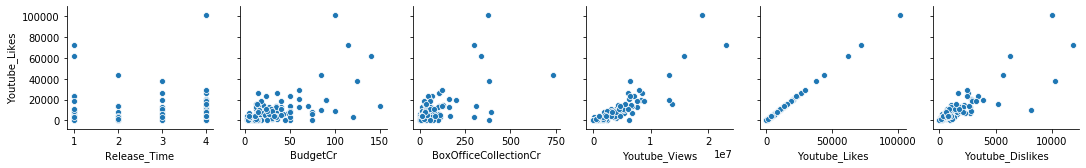

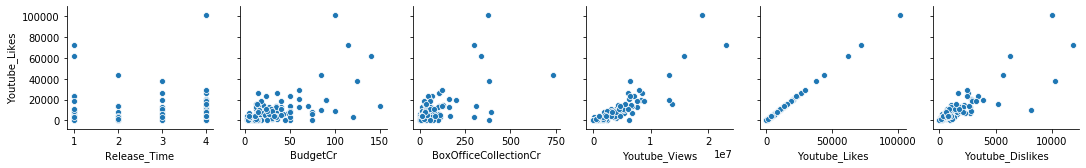

In [73]:
#correaltion plots using 'pairplot' to see the relationship for all features with the dependent varaiable 'Cost'.
for i in range (0,len(dataset_num.columns),6):
    sns.pairplot(dataset_num,y_vars=['Youtube_Likes'],x_vars=dataset_num.columns[1:1+6])

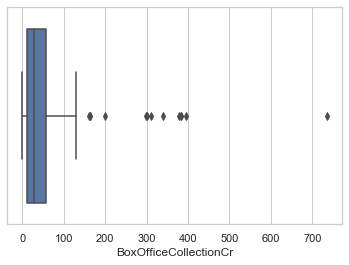

In [74]:
#Lets see any outlier in boxoffice collection 
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset_num["BoxOfficeCollectionCr"])

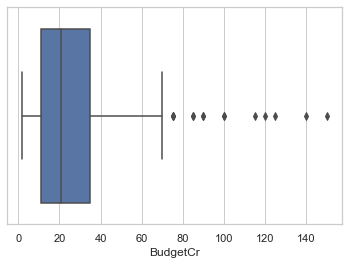

In [75]:
#Lets see any outlier in boxoffice collection 
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset_num["BudgetCr"])

Many more can be seen to analyze the outliers. Its not part of assignment hence not doing any inference or other box plots

# How many records are present in the dataset? Print the metadata information of dataset. 

In [76]:
print ("Number of records in the dataset    :", len(dataset))
print ("\nMetadata information in the dataset : \n")
print (dataset.info())

Number of records in the dataset    : 149

Metadata information in the dataset : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 10 columns):
Movie_ID                 149 non-null int64
Release_Date             149 non-null object
Movie_Name               149 non-null object
Release_Time             149 non-null int64
Genre                    149 non-null object
BudgetCr                 149 non-null float32
BoxOfficeCollectionCr    149 non-null float64
Youtube_Views            149 non-null int64
Youtube_Likes            149 non-null int64
Youtube_Dislikes         149 non-null int64
dtypes: float32(1), float64(1), int64(5), object(3)
memory usage: 12.2+ KB
None


# How many movies in each genre got released in different release times?                  

In [77]:
dataset['COUNTER'] =1       #initially, set that counter to 1.
#Group By Release time and then Genre and count the total released movies for each genre
group_data = dataset.groupby(['Release_Time','Genre'])['COUNTER'].sum() #sum function
print(group_data)

Release_Time  Genre   
1             Action       3
              Comedy       3
              Drama        4
              Romance      3
              Thriller     4
2             Action       3
              Comedy       5
              Drama        6
              Romance      3
              Thriller     1
3             Action       3
              Comedy       5
              Drama        1
              Romance      4
              Thriller     2
4             Action      15
              Comedy      23
              Drama       24
              Romance     15
              Thriller    22
Name: COUNTER, dtype: int64


In Dataset-1, given format is (1,2,3,4)
Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)

How to read above information

Festive Season (1) : 3 Action Movies, 3 Comedy, 4 Drama , 3 ROmance & 4 Thriller movies released.
Similarly, read other information. 
    


#  Which month of the year, maximum movie releases are seen?       

In [78]:
#Extract year from the release date and create a new column
dataset['year'] = pd.DatetimeIndex(dataset['Release_Date']).year

#Extract month from the release date and create a new column
dataset['month'] = pd.DatetimeIndex(dataset['Release_Date']).month

#Group the data year & month wise
group_data = dataset.groupby(['year','month'])['COUNTER'].sum()

#Sort the data into ascending order
group_data.sort_values(ascending=False,inplace=True)

print (group_data)


year  month
2014  5        12
2013  7         9
      1         8
      3         8
2014  3         8
      1         7
      7         7
      4         6
2013  2         6
      5         6
      10        6
2014  2         6
      6         5
2013  11        5
2014  9         5
2013  9         5
      6         5
2014  11        5
2013  4         5
2015  1         5
      2         4
2014  8         4
2013  8         4
2014  10        3
2015  3         3
2014  12        2
Name: COUNTER, dtype: int64


First row, gives us month of the year, maximum movie releases. 
May 2014 got 12 releases which is highest. 
Decending Sorted data based on number of movies released


# Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?                                                                          

In [79]:
dataset['COUNTER'] =1 
dataset_sorted = dataset.sort_values(by=['BudgetCr'],ascending=False)

#If total movies released in a month which are more tha 25 Cr within year
group_data = dataset_sorted.loc[dataset_sorted['BudgetCr'] >= 25.0].groupby(['year','month'])['COUNTER'].sum()

#Sort in decending order
group_data.sort_values(ascending=False,inplace=True)

print("Month of the year with movies with budget of 25 crore or more")
print(group_data.head(1))

Month of the year with movies with budget of 25 crore or more
year  month
2013  7        5
Name: COUNTER, dtype: int64


 
   Month of the year with movies with budget of 25 crore or more
    Ans: Month 7(July), Year 2013
        


In [80]:
#Lets validate the result as well for first interpretation
dataset.loc[(dataset['year'] == 2013) & (dataset['month'] == 7)]


,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,COUNTER,year,month
98,98,Jul-05-2013,Lootera,4,Romance,27.0,28.0,2581449,4416,819,1,2013,7
101,101,Jul-05-2013,Policegiri,4,Action,30.0,16.8,1754266,1674,420,1,2013,7
102,102,Jul-12-2013,Bhaag Milkha Bhaag,4,Drama,30.0,164.0,2635390,4622,456,1,2013,7
105,105,Jul-12-2013,B.A. Pass,4,Drama,2.0,5.9,2240961,842,348,1,2013,7
106,106,Jul-19-2013,Ramaiya Vastavaiya,4,Romance,35.0,30.0,3788488,4111,687,1,2013,7
108,108,Jul-19-2013,D Day,4,Action,30.0,24.0,1939868,1804,224,1,2013,7
110,110,Jul-26-2013,Issaq,4,Romance,10.0,5.0,68511,76,16,1,2013,7
112,112,Jul-26-2013,Bajatey Raho,4,Comedy,5.0,10.0,462722,513,77,1,2013,7
114,114,Jul-26-2013,Nasha,4,Thriller,4.0,8.0,613448,288,188,1,2013,7


Ans: In July, 2013, 5 movies released with budget 25 or more than 25 Crores

# Which are the top 10 movies with maximum return of investment (ROI)? Calculate ROI as (Box office collection – Budget) / Budget.    


In [81]:
#We will introduce the new column ROI and sort it in descending order and print first 10 rows. 
dataset['ROI'] = (dataset['BoxOfficeCollectionCr'] - dataset['BudgetCr'])/dataset['BudgetCr']

#Sort the column in descending order
dataset_sorted = dataset.sort_values(by=['ROI'],ascending=False)

#Print the top 10 movies based on ROI
print("Top 10 Movies with best ROI")
dataset_sorted[['Movie_Name','BoxOfficeCollectionCr','BudgetCr','ROI']].head(10)


Top 10 Movies with best ROI


,Movie_Name,BoxOfficeCollectionCr,BudgetCr,ROI
3,Rajdhani Express,383.0,7.0,53.714286
65,Aashiqui 2,110.0,12.0,8.166667
90,PK,735.0,85.0,7.647059
133,Grand Masti,298.0,35.0,7.514286
136,The Lunchbox,85.0,10.0,7.500000
88,Fukrey,36.2,5.0,6.240000
59,Mary Kom,104.0,15.0,5.933333
129,Shahid,40.0,6.0,5.666667
37,Humpty Sharma Ki Dulhania,130.0,20.0,5.500000
102,Bhaag Milkha Bhaag,164.0,30.0,4.466667
